In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

# Project Description

OilyGiant Mining Company is looking for locations to build new wells. In this project, we will:

1. Collect the oil well parameters in the selected region: oil quality and volume of reserves
2. Build a model for predicting the volume of reserves in the new wells
3. Pick the oil wells with the highest estimated values
4. Pick the region with the highest total profit for the selected oil wells

## Download and prepare data

In [2]:
#import datasets
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

### EDA

#### Geo_data_0

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
geo_data_0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
geo_data_0.duplicated().sum()

0

In [8]:
geo_data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


Data for geo_data_0 has no missing values or duplicates. All datatypes are acceptable.

#### Geo_data_1

In [9]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [12]:
geo_data_1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
geo_data_1.duplicated().sum()

0

In [14]:
geo_data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


data for geo_data_1 has no missing values or duplicates. All datatypes are acceptable.

#### Geo_data_2

In [15]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [16]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [18]:
geo_data_2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
geo_data_2.duplicated().sum()

0

In [20]:
geo_data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Data for geo_data_2 has no missing values or duplicates. All datatypes are acceptable.

Conclusion: Our 3 datasets seem to be ready for model

### Graphs

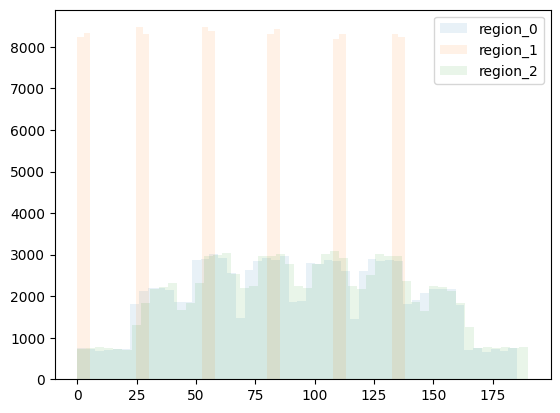

In [21]:
plt.hist(geo_data_0['product'], alpha=.1, bins=50)
plt.hist(geo_data_1['product'], alpha=.1, bins=50)
plt.hist(geo_data_2['product'], alpha=.1, bins=50)
plt.legend(['region_0', 'region_1', 'region_2'])

Text(0.5, 1.0, 'Product by Region')

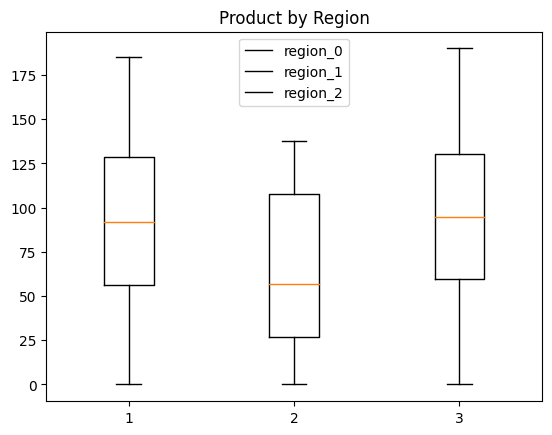

In [22]:
plt.boxplot([geo_data_0['product'], geo_data_1['product'], geo_data_2['product']])
plt.legend(['region_0', 'region_1', 'region_2'])
plt.title('Product by Region')

## Model Creation and Training

### Region 0

In [23]:
X_0 = geo_data_0.drop(['product', 'id'], axis=1)
y_0 = geo_data_0['product']

In [24]:
X_0_train, X_0_valid, y_0_train, y_0_valid = train_test_split(X_0, y_0, test_size = 0.25, random_state = 1234)

In [25]:
#Linear Regression Model
model_0 = LinearRegression()
model_0.fit(X_0_train, y_0_train)

LinearRegression()

In [26]:
model_0.score(X_0_valid, y_0_valid)

0.2740586761361865

Our model score is 0.27 which is very low compared to what we would expect the model accuracy to be for a model like this to be.

In [27]:
predictions_0 = model_0.predict(X_0_valid)
predictions_0

array([ 82.78094476,  41.89174099, 137.35610715, ..., 105.13914461,
        90.9467246 , 111.32639879])

In [28]:
r0_vals = pd.DataFrame()
r0_vals['predicted']= predictions_0
r0_vals['actual'] = y_0_valid.values
r0_vals.head()

,predicted,actual
0,82.780945,82.940945
1,41.891741,43.963568
2,137.356107,125.408598
3,105.695487,98.067233
4,99.545704,64.533441


In [29]:
np.sqrt(mean_squared_error(r0_vals['predicted'], r0_vals['actual']))

37.562394183637785

In [30]:
revenue_per_thousand_barrels = 4500
budget = 100000000

In [31]:
def calculate_profit(predicted, actual):
    # Align the index of predictions and target
    combined = pd.DataFrame({'predictions': predicted, 'target': actual})
    top_200 = combined.sort_values(by='predictions', ascending=False).head(200)
    
    # Calculate total reserves based on actual target values
    total_reserves = top_200['target'].sum()
    profit = total_reserves * revenue_per_thousand_barrels - budget
    
    return profit

In [32]:
calculate_profit(r0_vals['predicted'], r0_vals['actual'])

34240263.20247537

Region 0 has a profit projection based on our model of $34,240,163.20 with an RMSE score of 37.56. The accuracy of this model is not ideal.

### Region 1

In [33]:
X_1 = geo_data_1.drop(['product', 'id'], axis=1)
y_1 = geo_data_1['product']

In [34]:
X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(X_1, y_1, test_size = 0.25, random_state = 1234)

In [35]:
#Linear Regression Model
model_1 = LinearRegression()
model_1.fit(X_1_train, y_1_train)

LinearRegression()

In [36]:
model_1.score(X_1_valid, y_1_valid)

0.999619058765352

Our accuracy score is very high in this case with our accuracy score being almost 100%

In [37]:
predictions_1 = model_1.predict(X_1_valid)
predictions_1

array([ 53.25326369, 109.79649315,  -0.24409769, ...,  30.00299243,
        25.78667575, 107.06029495])

In [38]:
r1_vals = pd.DataFrame()
r1_vals['predicted']= predictions_1
r1_vals['actual'] = y_1_valid.values
r1_vals.head()

,predicted,actual
0,53.253264,53.906522
1,109.796493,110.992147
2,-0.244098,0.000000
3,137.133124,137.945408
4,28.252534,26.953261


In [39]:
np.sqrt(mean_squared_error(r1_vals['predicted'], r1_vals['actual']))

0.8939344738117704

In [40]:
r1_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200]

,predicted,actual
9827,138.694988,137.945408
19758,138.599400,137.945408
4812,138.592442,137.945408
21743,138.372817,137.945408
23764,138.305354,137.945408
...,...,...
8397,83.580171,84.038886
3606,83.556765,84.038886
10032,83.552136,84.038886
24829,83.530289,84.038886


In [41]:
calculate_profit(r1_vals['predicted'], r1_vals['actual'])

24150866.966815114

For region 1 our model score was exceptional at 0.999 accuracy and a RMSE of 0.89. We project the profit of this region to be $24,150,866.96 which is lower than region 0 but with a higher degree of accuracy. 

### Region 2

In [42]:
X_2 = geo_data_2.drop(['product', 'id'], axis=1)
y_2 = geo_data_2['product']

In [43]:
X_2_train, X_2_valid, y_2_train, y_2_valid = train_test_split(X_2, y_2, test_size = 0.25, random_state = 1234)

In [44]:
#Linear Regression Model
model_2 = LinearRegression()
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [45]:
model_2.score(X_2_valid, y_2_valid)

0.1983301043994069

Our accuracy score for this model is 20% 

In [46]:
predictions_2 = model_2.predict(X_2_valid)
predictions_2

array([ 72.53622294,  66.57986802,  80.75146269, ...,  63.832606  ,
       139.11929111, 109.03038805])

In [47]:
r2_vals = pd.DataFrame()
r2_vals['predicted']= predictions_2
r2_vals['actual'] = y_2_valid.values
r2_vals.head()

,predicted,actual
0,72.536223,77.366205
1,66.579868,40.588032
2,80.751463,57.820983
3,97.802814,89.209380
4,113.885918,120.450829


In [48]:
np.sqrt(mean_squared_error(r2_vals['predicted'], r2_vals['actual']))

40.10318099258418

In [49]:
r1_vals.sample(500).sort_values('predicted', ascending=False).iloc[0:200]

,predicted,actual
23509,138.284071,137.945408
5402,138.259505,137.945408
23170,138.122494,137.945408
9902,138.083486,137.945408
21449,138.052678,137.945408
...,...,...
3800,83.181805,84.038886
8585,83.086957,84.038886
6704,83.010849,84.038886
19137,82.951632,84.038886


In [50]:
calculate_profit(r2_vals['predicted'],r2_vals['actual'])

25549554.244339585

For region 2 we have an estimated profit of $25,549,554.24 which is lower than region 0. Our model has an accuracy score of 0.19 which is the lowest so far and an RMSE of 40.1.

## Profit Calculation & Risk

In [61]:
total_budget = 100_000_000  # in USD
num_wells = 200
revenue_per_barrel = 4.5  # in USD

# Calculations
cost_per_well = total_budget / num_wells
revenue_per_thousand_barrels = revenue_per_barrel * 1000  # since volume is in thousand barrels

# Calculate break-even volume
break_even_volume = cost_per_well / revenue_per_thousand_barrels

print(f'The break-even volume of reserves per well is approximately {break_even_volume:.2f} thousand barrels.')
# Calculate average volume of reserves for each region
average_volume_0 = geo_data_0['product'].mean()
average_volume_1 = geo_data_1['product'].mean()
average_volume_2 = geo_data_2['product'].mean()

# Print results
print(f"Break-even volume per well (thousand barrels): {break_even_volume:.2f}")
print(f"Average volume of reserves in Region 0: {average_volume_0:.2f}")
print(f"Average volume of reserves in Region 1: {average_volume_1:.2f}")
print(f"Average volume of reserves in Region 2: {average_volume_2:.2f}")

# Compare break-even volume with the average volumes in each region
if average_volume_0 >= break_even_volume:
    print("Region 0 is profitable based on the average volume of reserves.")
else:
    print("Region 0 is not profitable based on the average volume of reserves.")
    
if average_volume_1 >= break_even_volume:
    print("Region 1 is profitable based on the average volume of reserves.")
else:
    print("Region 1 is not profitable based on the average volume of reserves.")
    
if average_volume_2 >= break_even_volume:
    print("Region 2 is profitable based on the average volume of reserves.")
else:
    print("Region 2 is not profitable based on the average volume of reserves.")

The break-even volume of reserves per well is approximately 111.11 thousand barrels.
Break-even volume per well (thousand barrels): 111.11
Average volume of reserves in Region 0: 92.50
Average volume of reserves in Region 1: 68.83
Average volume of reserves in Region 2: 95.00
Region 0 is not profitable based on the average volume of reserves.
Region 1 is not profitable based on the average volume of reserves.
Region 2 is not profitable based on the average volume of reserves.


### Region 0

In [51]:
# Example constants
BOOTSTRAP_SAMPLES = 1000
BUDGET = 100_000_000  # 100 million USD
REVENUE_PER_BARREL = 4500  # 4.5 USD per barrel, given that reserves are in thousand barrels
WELLS_TO_PRODUCE = 200

profits = []

for i in range(BOOTSTRAP_SAMPLES):
    subsample = r0_vals.sample(500, replace=True)
    profit = calculate_profit(subsample['predicted'], subsample['actual'])
    profits.append(profit)

profits = np.array(profits)

# 5.2 Find average profit, 95% confidence interval, and risk of losses
average_profit = np.mean(profits)
confidence_interval = np.percentile(profits, [2.5, 97.5])
risk_of_loss = (profits < 0).mean()

print(f"Average Profit: {average_profit:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")
print(f"Risk of Losses: {risk_of_loss:.2%}")

# 5.3 Provide findings
print(f"Based on the bootstrap analysis, the average profit for this region is {average_profit:.2f}.")
print(f"The 95% confidence interval for the profit is between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}.")

if risk_of_loss < 0.025:
    print("The risk of losses is below 2.5%, thus this region is acceptable for development.")
else:
    print("The risk of losses is above 2.5%, thus this region is not recommended for development.")

Average Profit: 3858940.30
95% Confidence Interval: [-1614548.00181061  9190427.31284036]
Risk of Losses: 6.90%
Based on the bootstrap analysis, the average profit for this region is 3858940.30.
The 95% confidence interval for the profit is between -1614548.00 and 9190427.31.
The risk of losses is above 2.5%, thus this region is not recommended for development.


### Region 1

In [54]:
# Example constants
BOOTSTRAP_SAMPLES = 1000
BUDGET = 100_000_000  # 100 million USD
REVENUE_PER_BARREL = 4500  # 4.5 USD per barrel, given that reserves are in thousand barrels
WELLS_TO_PRODUCE = 200

profits = []

for i in range(BOOTSTRAP_SAMPLES):
    subsample = r1_vals.sample(500, replace=True)
    profit = calculate_profit(subsample['predicted'], subsample['actual'])
    profits.append(profit)

profits = np.array(profits)

# 5.2 Find average profit, 95% confidence interval, and risk of losses
average_profit = np.mean(profits)
confidence_interval = np.percentile(profits, [2.5, 97.5])
risk_of_loss = (profits < 0).mean()

print(f"Average Profit: {average_profit:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")
print(f"Risk of Losses: {risk_of_loss:.2%}")

# 5.3 Provide findings
print(f"Based on the bootstrap analysis, the average profit for this region is {average_profit:.2f}.")
print(f"The 95% confidence interval for the profit is between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}.")

if risk_of_loss < 0.025:
    print("The risk of losses is below 2.5%, thus this region is acceptable for development.")
else:
    print("The risk of losses is above 2.5%, thus this region is not recommended for development.")

Average Profit: 4181279.01
95% Confidence Interval: [ 427384.10476823 8125188.80550112]
Risk of Losses: 1.60%
Based on the bootstrap analysis, the average profit for this region is 4181279.01.
The 95% confidence interval for the profit is between 427384.10 and 8125188.81.
The risk of losses is below 2.5%, thus this region is acceptable for development.


### Region 2

In [55]:
# Example constants
BOOTSTRAP_SAMPLES = 1000
BUDGET = 100_000_000  # 100 million USD
REVENUE_PER_BARREL = 4500  # 4.5 USD per barrel, given that reserves are in thousand barrels
WELLS_TO_PRODUCE = 200

profits = []

for i in range(BOOTSTRAP_SAMPLES):
    subsample = r2_vals.sample(500, replace=True, random_state=i)
    profit = calculate_profit(subsample['predicted'], subsample['actual'])
    profits.append(profit)

profits = np.array(profits)

# 5.2 Find average profit, 95% confidence interval, and risk of losses
average_profit = np.mean(profits)
confidence_interval = np.percentile(profits, [2.5, 97.5])
risk_of_loss = (profits < 0).mean()

print(f"Average Profit: {average_profit:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")
print(f"Risk of Losses: {risk_of_loss:.2%}")

# 5.3 Provide findings
print(f"Based on the bootstrap analysis, the average profit for this region is {average_profit:.2f}.")
print(f"The 95% confidence interval for the profit is between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}.")

if risk_of_loss < 0.025:
    print("The risk of losses is below 2.5%, thus this region is acceptable for development.")
else:
    print("The risk of losses is above 2.5%, thus this region is not recommended for development.")

Average Profit: 3436809.61
95% Confidence Interval: [-2088051.19285253  8706049.53280224]
Risk of Losses: 9.40%
Based on the bootstrap analysis, the average profit for this region is 3436809.61.
The 95% confidence interval for the profit is between -2088051.19 and 8706049.53.
The risk of losses is above 2.5%, thus this region is not recommended for development.


# Conclusion

During this process we took 3 sets of data for 3 regions to determine the best options for new wells to start generating a profit. Our budget for development is $100 million USD for 200 wells. 

Based on our predictions, the best location for our new site location would be region 1 with an estimated profit ~34,000,000 and a very low risk of loss.  